In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv..')

In [18]:
print(gdp_df.dtypes)

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object


In [19]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv..')

In [20]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [21]:
print(gdp_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB
None


        4 Columns , 7661 Rows

In [33]:
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [35]:
gdp_df=gdp_df.rename(columns = {'Country or Area':'Country','Year':'Year', 'Value':'GDP_Per_Capita'})
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [37]:
display(gdp_df)

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


#7.

How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [38]:
all_years = gdp_df.groupby(["Country"])["Year"].count()
all_years

Country
Afghanistan                    20
Africa Eastern and Southern    33
Africa Western and Central     33
Albania                        33
Algeria                        33
                               ..
Viet Nam                       33
West Bank and Gaza             29
World                          33
Zambia                         33
Zimbabwe                       33
Name: Year, Length: 242, dtype: int64

In [41]:
uniq_yrs = gdp_df["year"].nunique()
uniq_yrs

KeyError: 'year'

In [42]:
uniq_yrs = gdp_df["Year"].nunique()
uniq_yrs

33

In [43]:
uniq_country = gdp_df["Country"].nunique()
uniq_country

242

In [46]:
country_allyears = gdp_df.groupby("Country").filter(lambda x: x.Year.count() == uniq_yrs)
country_allyears.nunique()

Country            202
Year                33
GDP_Per_Capita    6628
dtype: int64

202 Countries with all years accounted for. 40 countries that do not have data for all years accounted for.

 #8. 
 
 In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

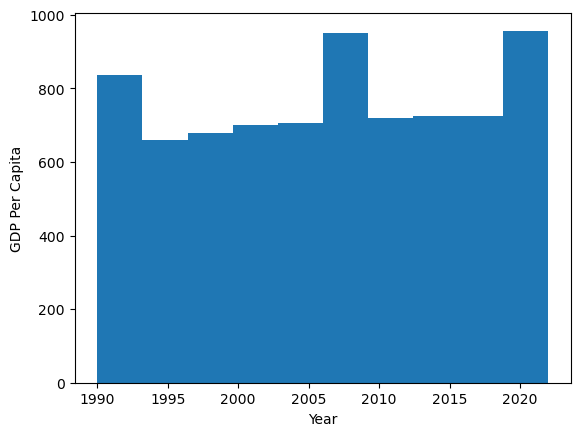

In [48]:
plt.hist(gdp_df.Year)
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.show()

^^ Going back to finish graphs on 3rd push ^^

#9.

What was the median GDP per capita value in 2020?

In [50]:
gdp_df['GDP_Per_Capita'].mean()

17206.97921917204

mean is 17206.97921917204